# Survival Analysis Project: Customer Churn

## Data Summary

The data analyzed here contains information about customer churn for a telecommunicaions company. The data can be downloaded [here](https://github.com/treselle-systems/customer_churn_analysis/blob/master/WA_Fn-UseC_-Telco-Customer-Churn.csv). 

The data includes a number of features about each user, such as their contract type, whether they stream movies and tv, their phone service, and so on.

## Analysis Objectives

The goal of this analysis is to model which features best explain the probabilty of a customer churning in the future.


In [1]:
# load packages:
import pandas as pd
import numpy as np
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter, CoxPHFitter

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import set_matplotlib_formats

%matplotlib inline

# set to show vector images
set_matplotlib_formats('pdf', 'svg')

## Data Overview

In [2]:
# load in the data:
data = pd.read_csv('telco-customer_churn.csv')
data.shape

(7043, 21)

In [3]:
# what are our features?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


First, I'm going to do some basic data cleaning and visualisation:

In [4]:
# check for any duplicates:
data.duplicated().sum()

0

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# any missing values?
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

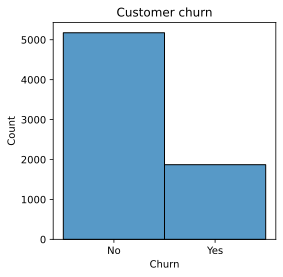

In [7]:
# How many of the customers have churned?
plt.figure(figsize=(4,4))
sns.histplot(data=data, x='Churn')
plt.title('Customer churn')
plt.show()

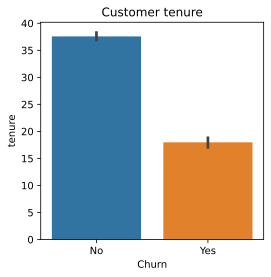

In [8]:
# How long on average were they/have they been a customer?
plt.figure(figsize=(4,4))
sns.barplot(data=data, x='Churn', y='tenure')
plt.title('Customer tenure')
plt.show()

The full sample -- Kaplan-Meier curve

In [9]:
# i'll need to convert churn to a binary variable:
data.replace({"Churn":{"No": 0, "Yes": 1}}, inplace=True)

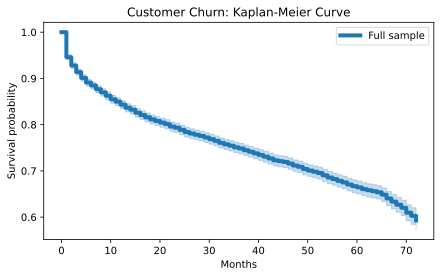

In [10]:
kmf = KaplanMeierFitter()

kmf.fit(data.tenure, data.Churn, label = 'Full sample')

kmf.plot(linewidth=4, figsize=(7, 4))
plt.title('Customer Churn: Kaplan-Meier Curve')
plt.xlabel('Months')
plt.ylabel('Survival probability')
plt.show()

Next, I'm going to visualize the possible effect of a few variables on churn:

**Males vs females**   
From the Kalpan-Meier curves below, gender doesn't appear to have much of an influence on customer churn.

In [11]:
df1 = data[data.gender == 'Male']
df2 = data[data.gender == 'Female']

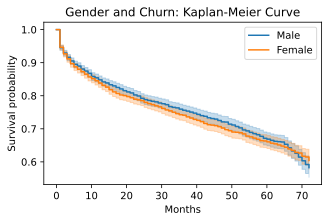

In [12]:
kmf.fit(df1.tenure, df1.Churn)
kmf.plot(label = 'Male', figsize=(5,3))
kmf.fit(df2.tenure, df2.Churn)
kmf.plot(label = 'Female', figsize=(5,3))
plt.title('Gender and Churn: Kaplan-Meier Curve')
plt.xlabel('Months')
plt.ylabel('Survival probability')
plt.show()

**Senior citizen**   
Being a senior citizen has a large influence on customer churn, likely for multiple reasons!

In [13]:
df1 = data[data.SeniorCitizen == 1]
df2 = data[data.SeniorCitizen == 0]

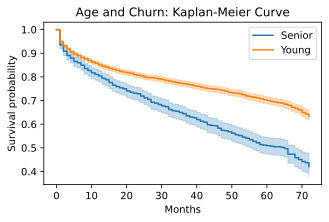

In [14]:
kmf.fit(df1.tenure, df1.Churn)
kmf.plot(label = 'Senior', figsize=(5,3))
kmf.fit(df2.tenure, df2.Churn)
kmf.plot(label = 'Young', figsize=(5,3))
plt.title('Age and Churn: Kaplan-Meier Curve')
plt.xlabel('Months')
plt.ylabel('Survival probability')
plt.show()

**Having dependents**   
Having dependents makes you much more likely to stay on as a customer.

In [15]:
df1 = data[data.Dependents == 'Yes']
df2 = data[data.Dependents == 'No']

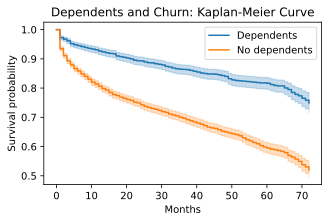

In [16]:
kmf.fit(df1.tenure, df1.Churn)
kmf.plot(label = 'Dependents', figsize=(5,3))
kmf.fit(df2.tenure, df2.Churn)
kmf.plot(label = 'No dependents', figsize=(5,3))
plt.title('Dependents and Churn: Kaplan-Meier Curve')
plt.xlabel('Months')
plt.ylabel('Survival probability')
plt.show()

**TV streaming**  
Finally, what about whether you pay for a for TV streaming? People who pay for TV streaming are less likely to churn, but that benefit does narrow slightly over time.

In [17]:
df1 = data[data.StreamingTV == 'Yes']
df2 = data[data.StreamingTV == 'No']

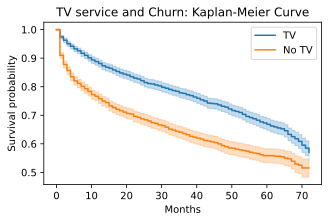

In [18]:
kmf.fit(df1.tenure, df1.Churn)
kmf.plot(label = 'TV', figsize=(5,3))
kmf.fit(df2.tenure, df2.Churn)
kmf.plot(label = 'No TV', figsize=(5,3))
plt.title('TV service and Churn: Kaplan-Meier Curve')
plt.xlabel('Months')
plt.ylabel('Survival probability')
plt.show()

## CPH Models

To test the hazard rated of our features, I'm now going to fit and compare cox proportional hazard models.

Before building any models, let's take a look at the correlation between my features:

In [19]:
# dummy code all variables:
data1 = data[['Churn', 'gender', 'SeniorCitizen', 'Dependents', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']]
data1.head()

,Churn,gender,SeniorCitizen,Dependents,DeviceProtection,StreamingTV,StreamingMovies
0,0,Female,0,No,No,No,No
1,0,Male,0,No,Yes,No,No
2,1,Male,0,No,No,No,No
3,0,Male,0,No,Yes,No,No
4,1,Female,0,No,No,No,No


In [20]:
data1 = pd.get_dummies(data1, drop_first=True).drop(columns=['DeviceProtection_No internet service','StreamingTV_No internet service','StreamingMovies_No internet service'])
data1['months'] = data.tenure
data1['charges'] = zscore(data.MonthlyCharges)
data1.head()

,Churn,SeniorCitizen,gender_Male,Dependents_Yes,DeviceProtection_Yes,StreamingTV_Yes,StreamingMovies_Yes,months,charges
0,0,0,0,0,0,0,0,1,-1.160323
1,0,0,1,0,1,0,0,34,-0.259629
2,1,0,1,0,0,0,0,2,-0.362660
3,0,0,1,0,1,0,0,45,-0.746535
4,1,0,0,0,0,0,0,2,0.197365


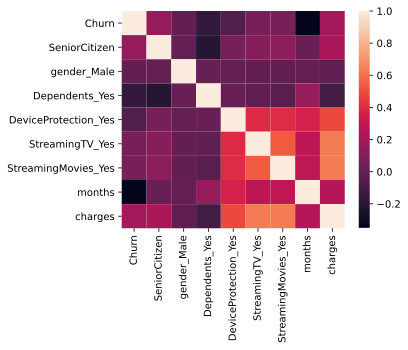

In [21]:
cors = data1.corr()
plt.figure(figsize=(5,4))
sns.heatmap(cors)
plt.show()

### Model 1: Demographics
In this model, I'm just going to include age (senior or not), gender, and any dependents. 

In [22]:
cph = CoxPHFitter()
cph.fit(data1.drop(columns=['charges','DeviceProtection_Yes','StreamingTV_Yes','StreamingMovies_Yes']), duration_col='months', event_col='Churn')
cph.print_summary(style='ascii')

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'months'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -15502.35
         time fit was run = 2021-03-25 02:08:16 UTC

---
                 coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                              
SeniorCitizen    0.36       1.43       0.05             0.25             0.46                 1.29                 1.59
gender_Male     -0.03       0.97       0.05            -0.12             0.06                 0.89                 1.07
Dependents_Yes  -0.83       0.44       0.06            -0.95            -0.70                 0.39                 0.49

                    z      p   -lo

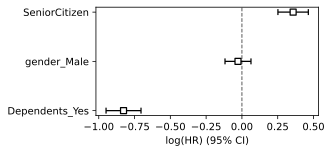

In [23]:
plt.figure(figsize=(4,2))
cph.plot()
plt.show()

As we could see from the above kaplan-meier plots, the first model confirms that age and dependents influence hazard risk over time.

### Model 2: Demographics + Device protection + Charges
Same as prior model, now also accounting for whether customers pay for device protection and how much their monthly charges are

In [24]:
cph = CoxPHFitter()
cph.fit(data1.drop(columns=['StreamingTV_Yes','StreamingMovies_Yes']), duration_col='months', event_col='Churn')
cph.print_summary(style='ascii')

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'months'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -15323.46
         time fit was run = 2021-03-25 02:08:17 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
SeniorCitizen          0.24       1.27       0.06             0.13             0.35                 1.14                 1.41
gender_Male           -0.04       0.96       0.05            -0.13             0.05                 0.88                 1.06
Dependents_Yes        -0.77       0.46       0.06            -0.89            -0.65                 0.41                 0.52
Devic

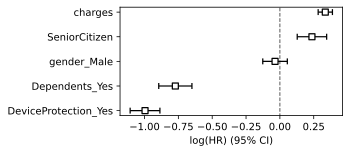

In [25]:
plt.figure(figsize=(4,2))
cph.plot()
plt.show()

Plot the kaplan-meier curve at different levels of monthly charge:

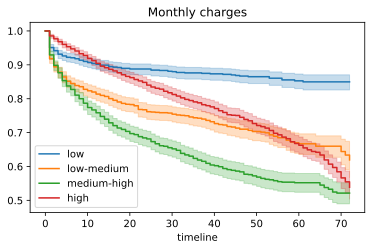

In [26]:
qs = [0, 0.25, 0.5, 0.75, 1]
labels = ['low','low-medium','medium-high','high']
for q in range(len(qs)-1):
    low_q = data1.charges.quantile(qs[q])
    high_q = data1.charges.quantile(qs[q+1])
    this_data = data1[(data1.charges >= low_q) & (data1.charges < high_q)]
    kmf.fit(this_data.months, event_observed=this_data.Churn)
    kmf.plot(label=labels[q], figsize=(6,3.5))
plt.title('Monthly charges')
plt.show()

This model shows that customers who pay for device protection and are less likely to churn, and those who pay a higher monthly charge are more likely to churn. However, this relationship is pretty interesting -- customers who have a high monthly charge are actually the least likely to churn within the first year, but then it becomes increasingly likely that they will churn. Customers who have a medium monthly charge are the most likely to churn, while customers who have a very low fee are the least likely to churn.  
Overall, this model is a better fit to the data than the prior model as indicated by a lower AIC.

### Model 3: All
Same as prior model, now also accounting for whether customers pay for TV and movie streaming

In [27]:
cph = CoxPHFitter()
cph.fit(data1, duration_col='months', event_col='Churn')
cph.print_summary(style='ascii')

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>
             duration col = 'months'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7043
number of events observed = 1869
   partial log-likelihood = -15282.64
         time fit was run = 2021-03-25 02:08:17 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
SeniorCitizen          0.22       1.25       0.06             0.11             0.33                 1.12                 1.39
gender_Male           -0.03       0.97       0.05            -0.13             0.06                 0.88                 1.06
Dependents_Yes        -0.75       0.47       0.06            -0.87            -0.63                 0.42                 0.53
Devic

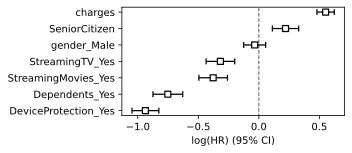

In [28]:
plt.figure(figsize=(4,2))
cph.plot()
plt.show()

This final model shows that streaming TV or movies reduces the change of customer churn. This model is only marginally better than Model 2, as indicated by a slightly lower AIC.

## Key Findings

The models show that having a lower monthly fee, having dependents, and having device protection are the main factor that mitigate customer churn. Accounting for more factors such as streaming services and age (senior citizen) also accounts for some variance in when customers churn, but gender is not an influential factor. The final model is likely to be the most appropriate to use. 

## Future directions and limitations

There are a number of ways in which these models could be improved. First, I did not account for any possible interactions between the features. For example, perhaps having dependents would reduce the negative impact of having a higher monthly charge rather than those features having an independent influence on customer churn. Second, data could be divided into training and test sets to test how well our features can predict customer churn in unseen data. Finally, more detailed analysis of customer demographics could be helpful, such as exact age, and also behavioral data such as the TV/movie viewing time, for example.